### Getting system info:

In [1]:
versioninfo()

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i7-6600U CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)


In [2]:
using Plots

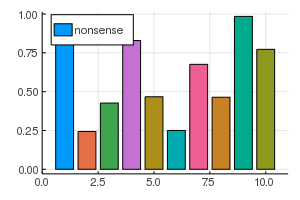

In [3]:
# colored bar chart:
bar(rand(10); fillcolor = 1:10, size=(300,200), label="nonsense",legend=:topleft)

In [14]:
x = 1:10;
@show(collect(x))
θ = mean(x)
println("θ = $θ")

collect(x) = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
θ = 5.5


In [16]:
a = 1.0
b = 2.0

2.0

In [19]:
c = a , b
a, b = b, a
@show(a)
@show(b)

a = 1.0

2.0


b = 2.0


In [7]:
# List Comprehension
x = 1:10;
x_squared = [z^2 for z in x];
[x x_squared]

10×2 Array{Int64,2}:
  1    1
  2    4
  3    9
  4   16
  5   25
  6   36
  7   49
  8   64
  9   81
 10  100

### Functions and multiple dispatch
Overloading is when you have a different number of arguments
Multiple dispatch is when the arguments are different types.

In [6]:
# Start with one definition of the function
sum_abs(x, y) = sqrt(x^2) + sqrt(y^2)

sum_abs (generic function with 1 method)

In [30]:
# overloading by adding another argument:
sum_abs(x, y, z) = sqrt(x^2) + sqrt(y^2) + sqrt(z^2)

sum_abs (generic function with 5 methods)

In [31]:
@show(sum_abs(1, 2.0))
@show(sum_abs(1, 2.0, 4))

sum_abs(1, 2.0) = 2.5
sum_abs(1, 2.0, 4) = 7.0


7.0

In [23]:
function sum_abs(x::Int, y::Int)
    d = x + y + 5
    return d
end


sum_abs (generic function with 4 methods)

In [24]:
@show(sum_abs(1, 2))
@show(sum_abs(1.0, 2.0))

sum_abs(1, 2) = 8
sum_abs(1.0, 2.0) = 4.0


4.0

In [25]:
function sum_abs(x::Int, y::Real)
    d = x/abs(y) + 2.0
    return d
end


sum_abs (generic function with 4 methods)

In [26]:
@show(sum_abs(1, 2))
@show(sum_abs(1.0, 2.0))
@show(sum_abs(1, 2.0))

sum_abs(1, 2) = 8
sum_abs(1.0, 2.0) = 4.0
sum_abs(1, 2.0) = 2.5


2.5

In [27]:
### We can pretend we are using Matlab and nail everything down into a Float64 box:
function sum_abs(x::Float64, y::Float64)
    d = abs(x*y) + 2.0
    return d
end

sum_abs (generic function with 4 methods)

In [28]:
@show(sum_abs(1, 2))
@show(sum_abs(1.0, 2))
@show(sum_abs(1, 2.0))
@show(sum_abs(1.0, 2.0))

sum_abs(1, 2) = 8
sum_abs(1.0, 2) = 3.0
sum_abs(1, 2.0) = 2.5
sum_abs(1.0, 2.0) = 4.0

4.0

In [20]:
using Distributions, StatsPlots, Plots

In [22]:
n = 10^6
x = 1.0 .+ 2.0.*rand(Beta(3,2), n);

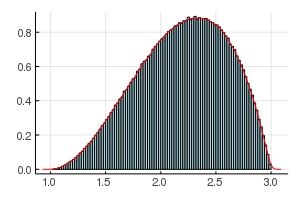

In [26]:
plot(x, st=:histogram, normalize = true, label="",color=:lightblue, size=(300,200))
plot!(x, st=:density, linecolor = :red, label = "")

In [27]:
@show([mean(x) std(x) median(x)])

[mean(x) std(x) median(x)] = [2.20029 0.399852 2.22811]


1×3 Array{Float64,2}:
 2.20029  0.399852  2.22811

In [31]:
@show(ci95 = quantile(x, [0.025, 0.975]));
@show(ci99 = quantile(x, [0.005, 0.995]));

ci95 = quantile(x, [0.025, 0.975]) = [1.38998, 2.8649]
ci99 = quantile(x, [0.005, 0.995]) = [1.22221, 2.94102]


In [32]:
savefig("random_plot_example.png")

In [53]:
function greater_than(x,y,z)
    if (x > y || x > z)
        println("x > y or z")
    elseif x == y && x != z
        println("x = y, x not equal to z")
    else
        println("whatever!") 
    end
end

        
    
        
        

greater_than (generic function with 2 methods)

In [54]:
greater_than(4,4, 5)

x = y, x not equal to z


In [40]:
x = 5; y = 4; z = 4
(x > y && z == y)

true

In [4]:
s = 0
function sum_it(n, interval)
 #   s = 0.0
    for i = 0.0:interval:n
        s += i  # s = s + i
    end
    return s
end

sum_it(20.0,0.1)    

UndefVarError: UndefVarError: s not defined

In [3]:
s =  1.0
sum_it(20.0, 0.1)

2010.0000000000002

In [67]:
const z2 = 0
f(x) = x + z2

f (generic function with 1 method)

In [69]:
z2 = 2
f(10)

10

In [71]:
f(x; z = 0) =  x + z

f (generic function with 1 method)

In [75]:
z = 100
@show(f(10))
@show(f(10, z=1))
@show(z)

f(10) = 10
f(10, z=1) = 11
z = 100

100

In [76]:
g(x) = x^2

g (generic function with 1 method)

In [81]:
@show(g(f(10,z=2)))
@show(f(g(10),z=2))

g(f(10, z=2)) = 144
f(g(10), z=2) = 102


102

In [83]:
gf = g ∘ f

#56 (generic function with 1 method)

In [85]:
gf(10)

100

In [5]:
z = [x^2 for x in 1:10]

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100